# India Vs Australia

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# from sklearn.multioutput import MultiOutputRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import BayesianRidge

## Read the Excel File 

In [2]:
scores_df = pd.read_excel("cricketscores.xlsx", sheet_name='Player Data')
demo_df = scores_df

In [3]:
demo_df.head(5)

,Player ID,Player name,Date,Versus,Ground,How Dismissed,Runs,B/F,S/R,Wickets,Runs Conceded,E/R,Bowling Average,Overs Bowled,Bat,Role
0,1,Adam Zampa,2016-02-06,New Zealand,Sky Stadium,did not bat,-,-,-,2,57,5.700000,28.500000,10.0,0,Bowler
1,1,Adam Zampa,2016-02-08,New Zealand,Seddon Park,c B B McCullum b C J Anderson,2,11,18.18,1,45,4.500000,45.000000,10.0,1,Bowler
2,1,Adam Zampa,2016-06-05,West Indies,Providence Stadium,did not bat,-,-,-,3,16,3.018868,5.333333,5.3,0,Bowler
3,1,Adam Zampa,2016-06-07,South Africa,Providence Stadium,lbw b Imran Tahir,0,1,0,1,46,4.600000,46.000000,10.0,1,Bowler
4,1,Adam Zampa,2016-06-11,South Africa,Warner Park,did not bat,-,-,-,3,52,5.200000,17.333333,10.0,0,Bowler


In [4]:
# Drop columns from the DataFrame
columns_to_drop = ['How Dismissed','Player name']
demodf_drop = demo_df.drop(columns=columns_to_drop)

demodf_drop['Runs'] = demodf_drop['Runs'].astype(str)

# Remove the asterisk from rows where it exists
demodf_drop['Runs'] = demodf_drop['Runs'].str.rstrip('*')

# Replace '-' with 0 in 'Column1'
demodf_drop['Runs'] = demodf_drop['Runs'].replace('-', 0)
demodf_drop['B/F'] = demodf_drop['B/F'].replace('-', 0)
demodf_drop['S/R'] = demodf_drop['S/R'].replace('-', 0)

demodf_drop['Runs']=demodf_drop['Runs'].astype(int)
demodf_drop['B/F']=demodf_drop['B/F'].astype(int)
demodf_drop['S/R']=demodf_drop['S/R'].astype(int)

# Convert the "Date" column to a datetime type
demodf_drop['Date'] = pd.to_datetime(demodf_drop['Date'])

# Sort the DataFrame by "PlayerID" and "Date"
demodf_drop = demodf_drop.sort_values(by=['Player ID', 'Date'])

In [5]:
# Convert 'Versus' to a categorical data type and assign codes
demodf_drop['Versus'] = demodf_drop['Versus'].astype('category')
demodf_drop['VersusC'] = demodf_drop['Versus'].cat.codes + 1
# To see what the year codes correspond to
versus_codes = demodf_drop['Versus'].cat.categories
versus_values = [str(value) for value in versus_codes]

# Display the correspondence between codes and values
for code, value in enumerate(versus_values, start=1):
    print(f"{code}: {value}")
    
    
# Convert 'Ground' to a categorical data type and assign codes
demodf_drop['Ground'] = demodf_drop['Ground'].astype('category')
demodf_drop['PlaceCode'] = demodf_drop['Ground'].cat.codes + 1
# To see what the year codes correspond to
place_codes = demodf_drop['Ground'].cat.categories
Place_values = [str(value) for value in place_codes]

# Display the correspondence between codes and values
for code, value in enumerate(Place_values, start=1):
    print(f"{code}: {value}")
    

# Convert 'Role' to a categorical data type and assign codes
demodf_drop['Role'] = demodf_drop['Role'].astype('category')
demodf_drop['RoleC'] = demodf_drop['Role'].cat.codes + 1
# To see what the year codes correspond to
Role_codes = demodf_drop['Role'].cat.categories
Role_values = [str(value) for value in Role_codes]

# Display the correspondence between codes and values
for code, value in enumerate(Role_values, start=1):
    print(f"{code}: {value}")

1: Afghanistan
2: Australia
3: Bangladesh
4: Canada
5: England
6: Hong Kong
7: India
8: Ireland
9: Kenya
10: Nepal
11: Netherlands
12: New Zealand
13: Pakistan
14: Scotland
15: South Africa
16: Sri Lanka
17: United Arab Emirates
18: West Indies
19: Zimbabwe
1: Adelaide Oval
2: Arnos Vale Ground
3: Arun Jaitley Stadium
4: Barabati Stadium
5: Barsapara Cricket Stadium
6: Bay Oval
7: Bellerive Oval
8: Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium
9: Boland Park
10: Brabourne Stadium
11: Brian Lara Stadium
12: Brisbane Cricket Ground
13: Captain Roop Singh Stadium
14: Cazaly's Stadium
15: Civil Service Cricket Club
16: Daren Sammy National Cricket Stadium
17: Dr YS Rajasekhara Reddy Cricket Stadium
18: Dubai International Cricket Stadium
19: Eden Gardens
20: Eden Park
21: Edgbaston
22: Gaddafi Stadium
23: Grange Cricket Club
24: Green Park
25: Greenfield International Stadium
26: Hagley Oval
27: Harare Sports Club
28: Headingley
29: Himachal Pradesh Cricket Association Stadi

In [6]:
# Define the window size for the moving average
window_size = 3  # You can adjust this as needed

# Group the data by player ID and sort by date within each group
grouped = demodf_drop.groupby('Player ID').apply(lambda x: x.sort_values('Date'))

In [7]:
# Calculate the moving average for each column
for column in demodf_drop.columns:
    if column not in ['Player ID', 'Versus', 'Date', 'Ground','Bat','Role']:
        
        # Calculate the moving average for the current column
        grouped[column + '_moving_avg'] = grouped.groupby('Player ID')[column].shift(1).rolling(window=window_size).mean().reset_index(level=0, drop=True)

# Reset the index to remove the multi-level index created by groupby and sort
grouped.reset_index(drop=True, inplace=True)

In [8]:
# If you want to export it to an excel file then use below code

# demodf_drop.to_excel(r'demodf_drop.xlsx', index=False)

In [9]:
# Separate the date into month and year columns
grouped['Month'] = grouped['Date'].dt.month
grouped['Year'] = grouped['Date'].dt.year

grouped['Month'] = grouped['Month'].astype(int)

In [10]:
grouped.head(5)

,Player ID,Date,Versus,Ground,Runs,B/F,S/R,Wickets,Runs Conceded,E/R,...,Wickets_moving_avg,Runs Conceded_moving_avg,E/R_moving_avg,Bowling Average_moving_avg,Overs Bowled_moving_avg,VersusC_moving_avg,PlaceCode_moving_avg,RoleC_moving_avg,Month,Year
0,1,2016-02-06,New Zealand,Sky Stadium,0,0,0,2,57,5.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016
1,1,2016-02-08,New Zealand,Seddon Park,2,11,18,1,45,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2016
2,1,2016-06-05,West Indies,Providence Stadium,0,0,0,3,16,3.018868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2016
3,1,2016-06-07,South Africa,Providence Stadium,0,1,0,1,46,4.600000,...,2.000000,39.333333,4.406289,26.277778,8.433333,14.0,65.000000,3.0,6,2016
4,1,2016-06-11,South Africa,Warner Park,0,0,0,3,52,5.200000,...,1.666667,35.666667,4.039623,32.111111,8.433333,15.0,58.333333,3.0,6,2016


In [11]:
# Drop columns 'B' and 'C' from the DataFrame
columns_to_drop = ['B/F', 'S/R','Date', 'Versus', 'Ground','Role', 'Runs Conceded', 'E/R','Bowling Average', 'Overs Bowled']


grouped = grouped.drop(columns=columns_to_drop)

In [12]:
# grouped.to_excel(r'demodf_drop.xlsx', index=False)

In [13]:
grouped.columns

Index(['Player ID', 'Runs', 'Wickets', 'Bat', 'VersusC', 'PlaceCode', 'RoleC',
       'Runs_moving_avg', 'B/F_moving_avg', 'S/R_moving_avg',
       'Wickets_moving_avg', 'Runs Conceded_moving_avg', 'E/R_moving_avg',
       'Bowling Average_moving_avg', 'Overs Bowled_moving_avg',
       'VersusC_moving_avg', 'PlaceCode_moving_avg', 'RoleC_moving_avg',
       'Month', 'Year'],
      dtype='object')

In [14]:
X = grouped.drop(columns=['Player ID'])

In [15]:
X = grouped[['Runs_moving_avg', 'B/F_moving_avg', 'S/R_moving_avg', 'Wickets_moving_avg', 'Runs Conceded_moving_avg',
                 'E/R_moving_avg', 'Bowling Average_moving_avg', 'Overs Bowled_moving_avg', 'VersusC', 'PlaceCode','Month','Year','Bat','RoleC']]  # Replace with your feature columns
y_Runs = grouped[['Runs']]  
y_Wickets = grouped[['Wickets']]


In [16]:
# Replace NaN with 0
X = X.fillna(0)
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data_train= scaler.fit_transform(X)

# print(normalized_data)

# Create a new DataFrame with the normalized data
norm_df = pd.DataFrame(normalized_data_train, columns=X.columns)


# Display the normalized DataFrame
print(norm_df)

      Runs_moving_avg  B/F_moving_avg  S/R_moving_avg  Wickets_moving_avg  \
0            0.000000        0.000000        0.000000            0.000000   
1            0.000000        0.000000        0.000000            0.000000   
2            0.000000        0.000000        0.000000            0.000000   
3            0.004866        0.030986        0.024624            0.461538   
4            0.004866        0.033803        0.024624            0.384615   
...               ...             ...             ...                 ...   
2570         0.141119        0.222535        0.180575            0.000000   
2571         0.009732        0.019718        0.077975            0.000000   
2572         0.306569        0.284507        0.254446            0.000000   
2573         0.304136        0.298592        0.210670            0.000000   
2574         0.304136        0.298592        0.210670            0.000000   

      Runs Conceded_moving_avg  E/R_moving_avg  Bowling Average_moving_avg 

In [17]:
norm_df['Player ID']=grouped['Player ID']
norm_df

,Runs_moving_avg,B/F_moving_avg,S/R_moving_avg,Wickets_moving_avg,Runs Conceded_moving_avg,E/R_moving_avg,Bowling Average_moving_avg,Overs Bowled_moving_avg,VersusC,PlaceCode,Month,Year,Bat,RoleC,Player ID
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.611111,0.839080,0.090909,0.5625,0.0,1.0,1
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.611111,0.758621,0.090909,0.5625,1.0,1.0,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.944444,0.609195,0.454545,0.5625,0.0,1.0,1
3,0.004866,0.030986,0.024624,0.461538,0.491667,0.367191,0.400169,0.843333,0.777778,0.609195,0.454545,0.5625,1.0,1.0,1
4,0.004866,0.033803,0.024624,0.384615,0.445833,0.336635,0.489002,0.843333,0.777778,0.977011,0.454545,0.5625,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,0.141119,0.222535,0.180575,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.586207,0.727273,1.0000,0.0,0.5,30
2571,0.009732,0.019718,0.077975,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.655172,0.727273,1.0000,1.0,0.5,30
2572,0.306569,0.284507,0.254446,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.655172,0.727273,1.0000,1.0,0.5,30
2573,0.304136,0.298592,0.210670,0.000000,0.000000,0.000000,0.000000,0.000000,0.833333,0.655172,0.727273,1.0000,0.0,0.5,30


## Split the dataset into training and testing sets

In [18]:
X_train, X_test,y_runs_train, y_runs_test, y_wickets_train, y_wickets_test= train_test_split(norm_df, y_Runs, y_Wickets, test_size=0.2, random_state=42)

## Training the dataset

In [19]:
# Part 1: Create a Gradient Boosting Regression model
gb_regressor_t = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)
gb_regressor_x = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, random_state=42)

# Part 1: Create a Random Forest Regression model
# gb_regressor_t = RandomForestRegressor(n_estimators=100, random_state=42)
# gb_regressor_x = RandomForestRegressor(n_estimators=100, random_state=42)

# # Part 1: Create a Bayesian Regression model
# gb_regressor_t = BayesianRidge()
# gb_regressor_x = BayesianRidge()


# model = MultiOutputRegressor(gb_regressor)

# Fit the model to the training data
gb_regressor_t.fit(X_train, y_runs_train)
gb_regressor_x.fit(X_train, y_wickets_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, random_state=42)

## Predicting the dataset

In [20]:
# Make predictions on the test data
# y_pred = gb_regressor.predict(X_test)
y_pred_t = gb_regressor_t.predict(X_test)
y_pred_x = gb_regressor_x.predict(X_test)

In [21]:
X_test.columns

Index(['Runs_moving_avg', 'B/F_moving_avg', 'S/R_moving_avg',
       'Wickets_moving_avg', 'Runs Conceded_moving_avg', 'E/R_moving_avg',
       'Bowling Average_moving_avg', 'Overs Bowled_moving_avg', 'VersusC',
       'PlaceCode', 'Month', 'Year', 'Bat', 'RoleC', 'Player ID'],
      dtype='object')

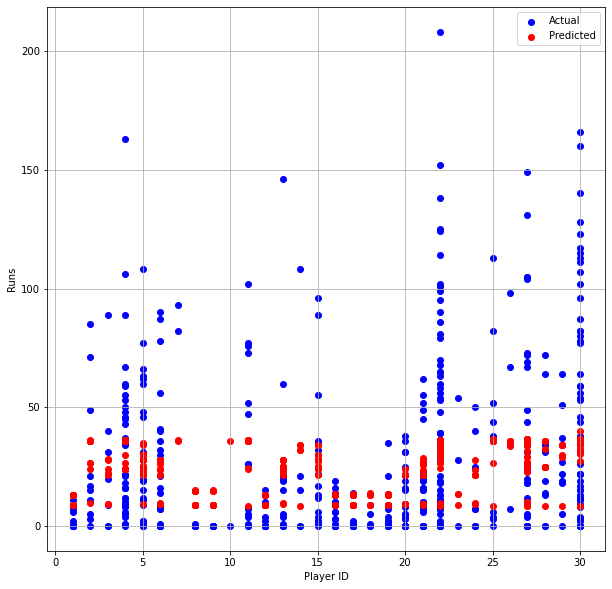

In [22]:
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(10, 10))
plt.scatter(X_test['Player ID'], y_runs_test, color='blue', label='Actual')
plt.scatter(X_test['Player ID'], y_pred_t, color='red', label='Predicted')

# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Player ID')
plt.ylabel('Runs')
# plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## RMSE

In [23]:
# Calculate Mean Squared Error (MSE) as a performance metric : Gradient Boosting
mse = mean_squared_error(y_runs_test, y_pred_t)
print(f"Mean Squared Error: {mse:.2f}")
# Calculate RMSE
rmse = np.sqrt(mse)

# Print RMSE
print(f'RMSE: {rmse:.2f}')

Mean Squared Error: 997.01
RMSE: 31.58


In [24]:
# Calculate Mean Squared Error (MSE) as a performance metric : Gradient Boosting
mse = mean_squared_error(y_wickets_test, y_pred_x)
print(f"Mean Squared Error: {mse:.2f}")
# Calculate RMSE
rmse = np.sqrt(mse)

# Print RMSE
print(f'RMSE: {rmse:.2f}')

Mean Squared Error: 0.72
RMSE: 0.85


## Final Prediction

In [35]:
test_df = pd.read_excel("Test.xlsx")
test_df.head(5)

,Runs_moving_avg,B/F_moving_avg,S/R_moving_avg,Wickets_moving_avg,Runs Conceded_moving_avg,E/R_moving_avg,Bowling Average_moving_avg,Overs Bowled_moving_avg,VersusC,PlaceCode,Month,Year,BatC,RoleC,Player ID
0,3.933333,4.733333,44.333333,2.066667,60.133333,6.280000,17.311111,9.266667,7,38,10,2023,1,3,1
1,27.533333,27.600000,72.266667,0.000000,0.000000,0.000000,-1.000000,0.000000,7,38,10,2023,1,2,2
2,11.933333,18.000000,43.933333,0.533333,42.133333,6.064127,21.633333,6.733333,7,38,10,2023,1,1,3
3,44.600000,37.200000,116.533333,0.000000,0.000000,0.000000,-1.000000,0.000000,7,38,10,2023,1,2,4
4,13.733333,18.333333,84.533333,0.800000,16.333333,2.790000,2.600000,3.533333,7,38,10,2023,1,1,5
5,33.000000,31.933333,59.200000,0.466667,18.800000,3.309444,11.133333,4.453333,2,38,10,2023,1,1,6
6,17.333333,24.733333,45.666667,0.000000,0.000000,0.000000,-1.000000,0.000000,2,38,10,2023,1,2,7
7,4.466667,6.000000,35.400000,0.000000,0.000000,0.000000,-1.000000,0.000000,2,38,10,2023,1,3,8
8,4.066667,2.600000,57.066667,0.000000,0.000000,0.000000,-1.000000,0.000000,7,38,10,2023,1,3,9
9,20.066667,20.133333,68.466667,0.000000,0.000000,0.000000,-1.000000,0.000000,7,38,10,2023,0,2,10


In [36]:
# y_pred_test_run = gb_regressor_t.predict(X_norm)
# y_pred_test_wic = gb_regressor_x.predict(X_norm)

y_pred_test_run = gb_regressor_t.predict(test_df)
y_pred_test_wic = gb_regressor_x.predict(test_df)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BatC
Feature names seen at fit time, yet now missing:
- Bat

  warnings.warn(message, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- BatC
Feature names seen at fit time, yet now missing:
- Bat

  warnings.warn(message, FutureWarning)


In [37]:
test_df['player_id']=test_df['Player ID']
test_df['runs'] = y_pred_test_run.astype(int)
test_df['wickets'] = y_pred_test_wic.astype(int)


In [38]:
test_df.columns

Index(['Runs_moving_avg', 'B/F_moving_avg', 'S/R_moving_avg',
       'Wickets_moving_avg', 'Runs Conceded_moving_avg', 'E/R_moving_avg',
       'Bowling Average_moving_avg', 'Overs Bowled_moving_avg', 'VersusC',
       'PlaceCode', 'Month', 'Year', 'BatC', 'RoleC', 'Player ID', 'player_id',
       'runs', 'wickets'],
      dtype='object')

In [39]:
# Drop columns 'B' and 'C' from the DataFrame
columns_to_drop = ['Runs_moving_avg', 'B/F_moving_avg', 'S/R_moving_avg',
       'Wickets_moving_avg', 'Runs Conceded_moving_avg', 'E/R_moving_avg',
       'Bowling Average_moving_avg', 'Overs Bowled_moving_avg', 'VersusC',
       'PlaceCode', 'Month', 'Year', 'BatC', 'RoleC','Player ID']


test_df = test_df.drop(columns=columns_to_drop)

In [40]:
test_df

,player_id,runs,wickets
0,1,29,1
1,2,35,0
2,3,29,1
3,4,35,0
4,5,29,1
5,6,29,1
6,7,35,0
7,8,35,0
8,9,35,0
9,10,8,0


In [213]:
# Save the results to a Excel file
# test_df.to_excel(r'final.xlsx', index=False)
# Save the results to a CSV file
test_df.to_csv('Final.csv', index=False)

In [41]:
ac_df = pd.read_excel("cricketscores.xlsx", sheet_name='Actual Data')
ac_df.head(10)

,Player ID,Player name,Team,runs_gb,wickets_gb,runs_rf,wickets_rf,Actual runs,Actual wks
0,1,Adam Zampa,A,29,1,29,1,6,0
1,2,Alex Carey,A,35,0,35,0,0,0
2,3,Cameron Green,A,29,1,29,1,8,0
3,4,David Warner,A,35,0,35,0,41,0
4,5,Glen Maxwell,A,29,1,29,1,15,0
5,6,Hardik Pandya,i,29,1,29,1,11,1
6,7,Ishan Kishan,i,35,0,35,0,0,0
7,8,Jaspreet Bumrah,i,35,0,35,0,0,2
8,9,Josh Hazelwood,A,35,0,35,0,1,3
9,10,Josh Inglis,A,35,0,8,0,0,0


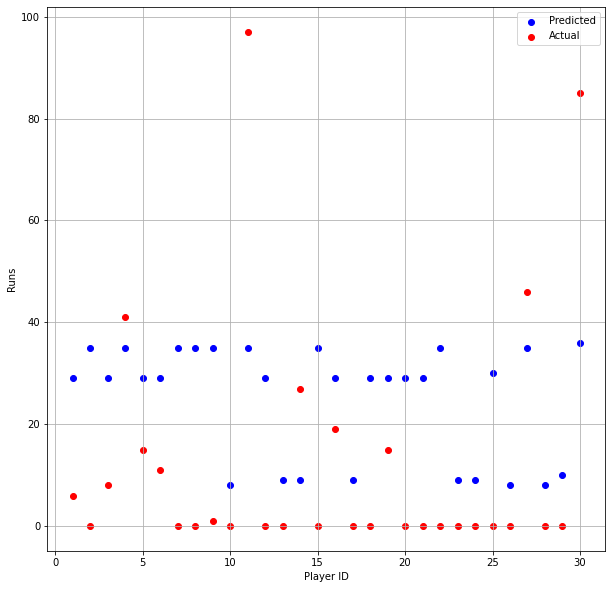

In [42]:
# Create a scatter plot to visualize the actual vs. predicted values
plt.figure(figsize=(10, 10))
plt.scatter(test_df['player_id'], test_df['runs'], color='blue', label='Predicted')
plt.scatter(test_df['player_id'], ac_df['Actual runs'], color='red', label='Actual')

# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction Line')
plt.xlabel('Player ID')
plt.ylabel('Runs')
# plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Calculate Mean Squared Error (MSE) as a performance metric : Gradient Boosting
mse = mean_squared_error(test_df['runs'], ac_df['Actual runs'])
print(f"Mean Squared Error: {mse:.2f}")
# Calculate RMSE
rmse = np.sqrt(mse)

# Print RMSE
print(f'RMSE: {rmse:.2f}')

Mean Squared Error: 689.10
RMSE: 26.25
